Uploading the data set

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset Details.txt to Dataset Details.txt
Saving target.csv to target.csv
Saving features.csv to features.csv


Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

Reading the dataset

In [ ]:
X = pd.read_csv('features.csv', header = None)
Y = pd.read_csv('target.csv', header = None)
print(X, Y)

                0           1
0    1.417837e+06  130.331364
1    1.170866e+06  114.834354
2    1.326528e+06   52.048800
3    1.436353e+06   56.271637
4    1.667446e+06  112.761949
..            ...         ...
495  1.070062e+06   89.464539
496  1.464367e+06   98.961825
497  1.342927e+06   40.139589
498  1.476000e+06   78.434960
499  1.518822e+06  119.876434

[500 rows x 2 columns]           0
0      Male
1    Female
2    Female
3    Female
4      Male
..      ...
495  Female
496    Male
497  Female
498    Male
499    Male

[500 rows x 1 columns]


Replacing taget values from string to boolean

In [ ]:
Y = Y.replace(to_replace='Male', value = '1')
Y = Y.replace(to_replace='Female', value = '0')
print(Y)

     0
0    1
1    0
2    0
3    0
4    1
..  ..
495  0
496  1
497  0
498  1
499  1

[500 rows x 1 columns]


Separating the male and female data for plotting

In [ ]:
height, weight = X[0], X[1]

male_height = []
male_weight = []
female_height = []
female_weight = []

for i in range(len(Y[0])):
  if Y[0][i] == '1':
    male_height.append(height[i])
    male_weight.append(weight[i])
  else:
    female_height.append(height[i])
    female_weight.append(weight[i])

print(len(male_height), len(male_weight), len(female_height), len(female_weight))


177 177 323 323


Plotting the data

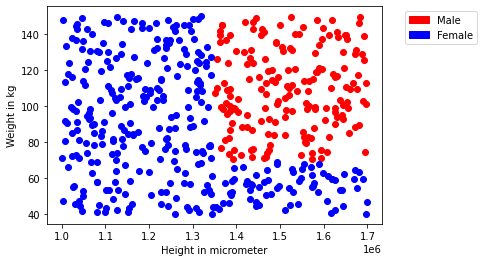

In [ ]:
red_patch = mpatches.Patch(color='red', label='Male')
blue_patch = mpatches.Patch(color='blue', label='Female')
plt.legend(handles=[red_patch, blue_patch], loc = 'upper right', bbox_to_anchor = (1.3, 1))
plt.scatter(male_height, male_weight, c='r')
plt.scatter(female_height, female_weight, c='b')
plt.xlabel('Height in micrometer')
plt.ylabel('Weight in kg')
plt.show()

Splitting data into training and testing, 2 : 1 ratio.

In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.33, random_state=42, shuffle=True)

print(len(X_Train), len(X_Test), len(Y_Train), len(Y_Test))

335 165 335 165


Apply decision tree algorithm

In [ ]:
from sklearn import tree

DT_Classfier = tree.DecisionTreeClassifier()
DT_Classfier = DT_Classfier.fit(X_Train, Y_Train)
DT_Prediction = DT_Classfier.predict(X_Test)

Calculate the metrics for the prediction

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(Y_test, DT_Prediction))
print()

matrix = confusion_matrix(Y_test, DT_Prediction)
print("The confusion Matrix: ")
print(confusion_matrix(Y_test, DT_Prediction))
print()


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       113
           1       1.00      0.98      0.99        52

    accuracy                           0.99       165
   macro avg       1.00      0.99      0.99       165
weighted avg       0.99      0.99      0.99       165


The confusion Matrix: 
[[113   0]
 [  1  51]]



**Conclusion:** since all the scores are high for both the classes, we can say that the classifier is working properly.

Now for KNN classification.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1, 40):
  KNN_Classifier = KNeighborsClassifier(n_neighbors=i+1)
  KNN_Classifier.fit(X_Train, Y_Train.values.ravel())
  KNN_prediction = KNN_Classifier.predict(X_Test)
  error_rate.append(np.mean(KNN_prediction != Y_Test[0]))

Plotting the error rate against the K value

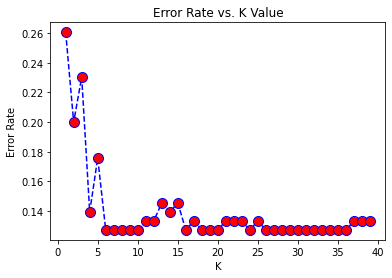

In [ ]:
plt.plot(range(1, 40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

Error rate is minimum somewhere in the range 5 to 11, so we will choose K = 10

In [ ]:
KNN_Classifier = KNeighborsClassifier(n_neighbors=10)
KNN_Classifier.fit(X_Train, Y_Train.values.ravel())
KNN_prediction = KNN_Classifier.predict(X_Test)

Calculating metrics for KNN Classifier

In [ ]:
print(classification_report(Y_test, KNN_prediction))
print()

matrix = confusion_matrix(Y_test, KNN_prediction)
print("The confusion Matrix: ")
print(confusion_matrix(Y_test, KNN_prediction))
print()

              precision    recall  f1-score   support

           0       0.98      0.83      0.90       113
           1       0.72      0.96      0.83        52

    accuracy                           0.87       165
   macro avg       0.85      0.90      0.86       165
weighted avg       0.90      0.87      0.88       165


The confusion Matrix: 
[[94 19]
 [ 2 50]]



**Conclusion**, The accuracy and other scores is lower than that of the Decision Tree. So next we will use normalization and see if it improves the result or not.

Applying min max normalisation and verifying if the values are between 0 and 1 or not

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

print(X_scaled.min(axis=0))
print(X_scaled.max(axis=0))

print(X_scaled.shape)

[0. 0.]
[1. 1.]
(500, 2)


Visualization of the scaled data


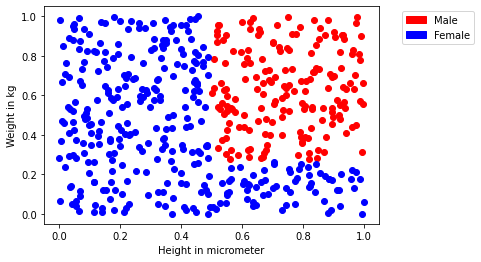

In [ ]:
height, weight = X_scaled[:, 0], X_scaled[:, 1]

male_height = []
male_weight = []
female_height = []
female_weight = []

for i in range(len(Y[0])):
  if Y[0][i] == '1':
    male_height.append(height[i])
    male_weight.append(weight[i])
  else:
    female_height.append(height[i])
    female_weight.append(weight[i])

red_patch = mpatches.Patch(color='red', label='Male')
blue_patch = mpatches.Patch(color='blue', label='Female')
plt.legend(handles=[red_patch, blue_patch], loc = 'upper right', bbox_to_anchor = (1.3, 1))
plt.scatter(male_height, male_weight, c='r')
plt.scatter(female_height, female_weight, c='b')
plt.xlabel('Height in micrometer')
plt.ylabel('Weight in kg')
plt.show()


The distribution remains almost the same, now applying the KNN on this normalised data

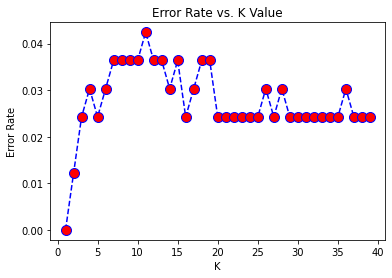

In [ ]:
X_Train_scaled, X_Test_scaled, Y_Train_scaled, Y_Test_scaled = train_test_split(X_scaled, Y, test_size=0.33, random_state=42, shuffle=True)

error_rate = []

for i in range(1, 40):
  KNN_Classifier_scaled = KNeighborsClassifier(n_neighbors=i)
  KNN_Classifier_scaled.fit(X_Train_scaled, Y_Train_scaled.values.ravel())
  KNN_prediction_scaled = KNN_Classifier_scaled.predict(X_Test_scaled)
  error_rate.append(np.mean(KNN_prediction_scaled != Y_Test_scaled[0]))

plt.plot(range(1, 40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

Now the error rate becomes stabalised near 20 to 25, so choosing K = 25.

In [ ]:
KNN_Classifier_scaled = KNeighborsClassifier(n_neighbors=25)
KNN_Classifier_scaled.fit(X_Train_scaled, Y_Train_scaled.values.ravel())
KNN_prediction_scaled = KNN_Classifier_scaled.predict(X_Test_scaled)

print(classification_report(Y_Test_scaled, KNN_prediction_scaled))
print()

print("The confusion Matrix: ")
print(confusion_matrix(Y_Test_scaled, KNN_prediction_scaled))
print()

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       113
           1       1.00      0.92      0.96        52

    accuracy                           0.98       165
   macro avg       0.98      0.96      0.97       165
weighted avg       0.98      0.98      0.98       165


The confusion Matrix: 
[[113   0]
 [  4  48]]



We can observe that, accuracy as well as all other scores improved after normalisation. Now the this classifier has results close to the decision tree classifier.

For unnormalised dataset the auc value is 0.9, and the roc curve is as follows

[]

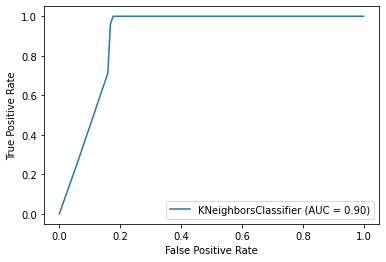

In [ ]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(KNN_Classifier, X_Test, Y_Test)
plt.plot()

For normalised dataset the auc value is 1.0, and the roc curve is as follows

[]

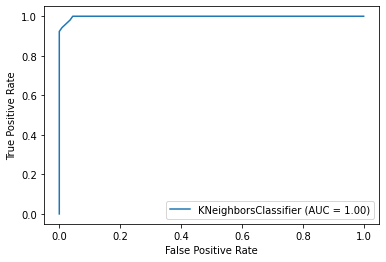

In [ ]:
plot_roc_curve(KNN_Classifier_scaled, X_Test_scaled, Y_Test_scaled)
plt.plot()

The normalised data classifier has higher AUC value, the higher the AUC value the better is the classifier.